# **Lab06: Create a Basic Convolutional Neural Network for Image Classification**

## 1. Import Library and Data

In [1]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#@title Code for loading the data
# import libraries 
import tensorflow as tf 
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

# utilities library
import cv2
import os

import random 
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)
os.environ['PYTHONHASHSEED'] = '0'


data_path = '/content/gdrive/My Drive/Colab Notebooks/DTT2022/data/jaffe/jaffe'
data_dir_list = os.listdir(data_path)

img_data_list=[]
img_label = []
label_map = {}
i = 0 

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    label_map[i] = str(dataset)
    
    # print ('Load the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        img_label.append(i)
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)
    i += 1

img_data = np.array(img_data_list)
img_data = img_data.astype('float')
img_data = img_data/255 #normalization
img_label = np.array(img_label)

# num_classes = 6
# num_of_samples = img_data.shape[0]
# img_label = np.ones((num_of_samples,),dtype='int')

# img_label[0:29]=0 #30
# img_label[30:58]=1 #29
# img_label[59:90]=2 #32
# img_label[91:121]=3 #31
# img_label[122:152]=4 #31
# img_label[153:]=5 #30
# names = ['ANGRY','DISGUST','FEAR','HAPPY','SAD','SURPRISE']

def getlabel(id):
    return label_map[id]

**About this Data**: 

We will use the Japanese Female Facial Expression (JAFFE) dataset which has 183 images of 10 different female models posing for 6 emotions. The data will be normalized so its value will ranging from 0 to 1. 

The label will be denoted as numbers, which follow this mapping : 

|    | Expression   |
|---:|:-------------|
|  0 | DISGUST          |
|  1 | SAD          |
|  2 | SURPRISE       |
|  3 |   ANGRY    |
|  4 |  HAPPY      |
|  5 |   FEAR    |

<details> <summary>Cite the author</summary>
Michael J. Lyons, Shigeru Akamatsu, Miyuki Kamachi, Jiro Gyoba. Coding Facial Expressions with Gabor Wavelets, 3rd IEEE International Conference on Automatic Face and Gesture Recognition, pp. 200-205 (1998). http://doi.org/10.1109/AFGR.1998.670949 Open access content available at: https://zenodo.org/record/3430156

</details>

split the data into train and test set so that we can perform **cross validation** later

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(img_data, img_label, test_size=0.1, random_state=0)

___

## 2. Create the Model

In previous two notebook, we already created a similar model using keras. Here's the code if you wanted to remember.

In [4]:
# simple model in 1st Notebook
model_simple = keras.Sequential()
model_simple.add(keras.layers.Dense(units=1, input_shape=[1]))

model_simple.compile(optimizer='SGD', loss='mean_squared_error')

In [5]:
# Neural Network in 2nd Notebook
model_nn = keras.Sequential()

model_nn.add(keras.layers.Flatten(input_shape=(128,128,3)) ) # flatten layer 
model_nn.add(keras.layers.Dense(units = 128,activation='relu') )  #input layer 
model_nn.add(keras.layers.Dense(units = 64, activation='relu') )  # hidden layer 
model_nn.add(keras.layers.Dense(units = 6, activation='softmax') ) # output layer 

model_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In this Lab, we will build a simple CNNs to do the image classification. We are now trying to add a convolutional part to our model. Mind the changes compared to previous basic neural network

In [6]:
model_cnn = keras.Sequential()

model_cnn.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), input_shape=(128,128,3), padding='same', activation="relu"))
model_cnn.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnn.add(keras.layers.MaxPooling2D())

model_cnn.add(keras.layers.Flatten()) # flatten layer 
model_cnn.add(keras.layers.Dense(units = 128,activation='relu') )  #input layer 
model_cnn.add(keras.layers.Dense(units = 64, activation='relu') )  # hidden layer 
model_cnn.add(keras.layers.Dense(units = 6, activation='softmax') ) # output layer 

model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
# summarize the model to see what happened inside
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      1216      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 131072)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               16777344  
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                      

## 3. Train the Model

In [8]:
model_cnn.fit(x_train, y_train, epochs=20, verbose=1);

Epoch 1/20
6/6 [==============================] - 10s 44ms/step - loss: 6.5812 - accuracy: 0.1951
Epoch 2/20
6/6 [==============================] - 0s 19ms/step - loss: 2.1301 - accuracy: 0.1098
Epoch 3/20
6/6 [==============================] - 0s 19ms/step - loss: 1.8165 - accuracy: 0.1585
Epoch 4/20
6/6 [==============================] - 0s 18ms/step - loss: 1.7915 - accuracy: 0.1463
Epoch 5/20
6/6 [==============================] - 0s 19ms/step - loss: 1.7561 - accuracy: 0.2012
Epoch 6/20
6/6 [==============================] - 0s 18ms/step - loss: 1.7438 - accuracy: 0.2561
Epoch 7/20
6/6 [==============================] - 0s 18ms/step - loss: 1.6771 - accuracy: 0.3537
Epoch 8/20
6/6 [==============================] - 0s 19ms/step - loss: 1.6026 - accuracy: 0.3232
Epoch 9/20
6/6 [==============================] - 0s 19ms/step - loss: 1.4952 - accuracy: 0.4573
Epoch 10/20
6/6 [==============================] - 0s 19ms/step - loss: 1.4148 - accuracy: 0.4329
Epoch 11/20
6/6 [===========

## 4. Exercise: Test the Model

In [27]:
# Hints: You can refer to Lab05
# Exercise: Select the 7th image in the test set as sample, and pass it to the model to see the classification result

# Step 1: select 7-th image as sample
sample = x_test[6:7]
sample

array([[[[0.45490196, 0.45490196, 0.45490196],
         [0.45098039, 0.45098039, 0.45098039],
         [0.46666667, 0.46666667, 0.46666667],
         ...,
         [0.42352941, 0.42352941, 0.42352941],
         [0.41960784, 0.41960784, 0.41960784],
         [0.42352941, 0.42352941, 0.42352941]],

        [[0.47058824, 0.47058824, 0.47058824],
         [0.4627451 , 0.4627451 , 0.4627451 ],
         [0.4627451 , 0.4627451 , 0.4627451 ],
         ...,
         [0.41568627, 0.41568627, 0.41568627],
         [0.41568627, 0.41568627, 0.41568627],
         [0.41960784, 0.41960784, 0.41960784]],

        [[0.4627451 , 0.4627451 , 0.4627451 ],
         [0.4627451 , 0.4627451 , 0.4627451 ],
         [0.4745098 , 0.4745098 , 0.4745098 ],
         ...,
         [0.41960784, 0.41960784, 0.41960784],
         [0.43137255, 0.43137255, 0.43137255],
         [0.41960784, 0.41960784, 0.41960784]],

        ...,

        [[0.23921569, 0.23921569, 0.23921569],
         [0.24705882, 0.24705882, 0.24705882]

In [31]:
# Step 2: Print the original label for the image
og_label = y_test[6]
print(f"The original label for the given sample is {og_label}")
print(f"That translates to {getlabel(og_label)}")

The original label for the given sample is 0
That translates to SURPRISE


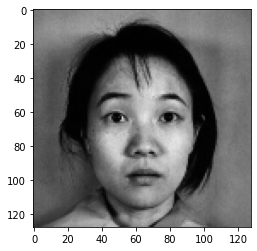

In [40]:

# Step 3: Plot the image to validate
plt.imshow(sample[0])

In [32]:
# # Step 4: Predict sample image
model_cnn.predict(sample)

array([[9.9317920e-01, 5.3749618e-04, 1.8099430e-03, 1.9272483e-07,
        8.1130056e-05, 4.3919669e-03]], dtype=float32)

In [33]:
# Step 5: Use np argmax to get the highest number (most activated) of output layer
maxi = np.argmax(model_cnn.predict(sample))
maxi

0

In [37]:
# Step 6: Convert the prediction result to string
print(getlabel(maxi))

if getlabel(maxi) == getlabel(og_label):
  print("The model predicted the image accurately")

SURPRISE
The model predicted the image accurately


# Comparing Neural Network with CNN

In [38]:
# train the basic neural network we previously have defined
model_nn.fit(x_train, y_train, epochs=40)

Epoch 1/40
6/6 [==============================] - 0s 6ms/step - loss: 14.0663 - accuracy: 0.1890
Epoch 2/40
6/6 [==============================] - 0s 6ms/step - loss: 10.5370 - accuracy: 0.2134
Epoch 3/40
6/6 [==============================] - 0s 6ms/step - loss: 4.2060 - accuracy: 0.2317
Epoch 4/40
6/6 [==============================] - 0s 6ms/step - loss: 3.4505 - accuracy: 0.2439
Epoch 5/40
6/6 [==============================] - 0s 5ms/step - loss: 2.6598 - accuracy: 0.3049
Epoch 6/40
6/6 [==============================] - 0s 6ms/step - loss: 2.0766 - accuracy: 0.3598
Epoch 7/40
6/6 [==============================] - 0s 6ms/step - loss: 1.8528 - accuracy: 0.4024
Epoch 8/40
6/6 [==============================] - 0s 6ms/step - loss: 1.7410 - accuracy: 0.4085
Epoch 9/40
6/6 [==============================] - 0s 6ms/step - loss: 2.0010 - accuracy: 0.3293
Epoch 10/40
6/6 [==============================] - 0s 5ms/step - loss: 1.7827 - accuracy: 0.4451
Epoch 11/40
6/6 [====================

In [39]:
score_accuracy = model_nn.evaluate(x_test, y_test)

1/1 [==============================] - 0s 123ms/step - loss: 0.7563 - accuracy: 0.6842
